While sklearn can be parallelized and extremely versitile in the breath of algorithms it exposes it is not built for "medium"/"big" data. Some algorithms are "incremental" in the sense that they can be updated with only a small window on the training data (see http://scikit-learn.org/stable/modules/scaling_strategies.html). But for many learning algorithms, data is usually kept in RAM (and potentially copied many times) so you typically cannot learn on data with featurized size $>$ 10% RAM.

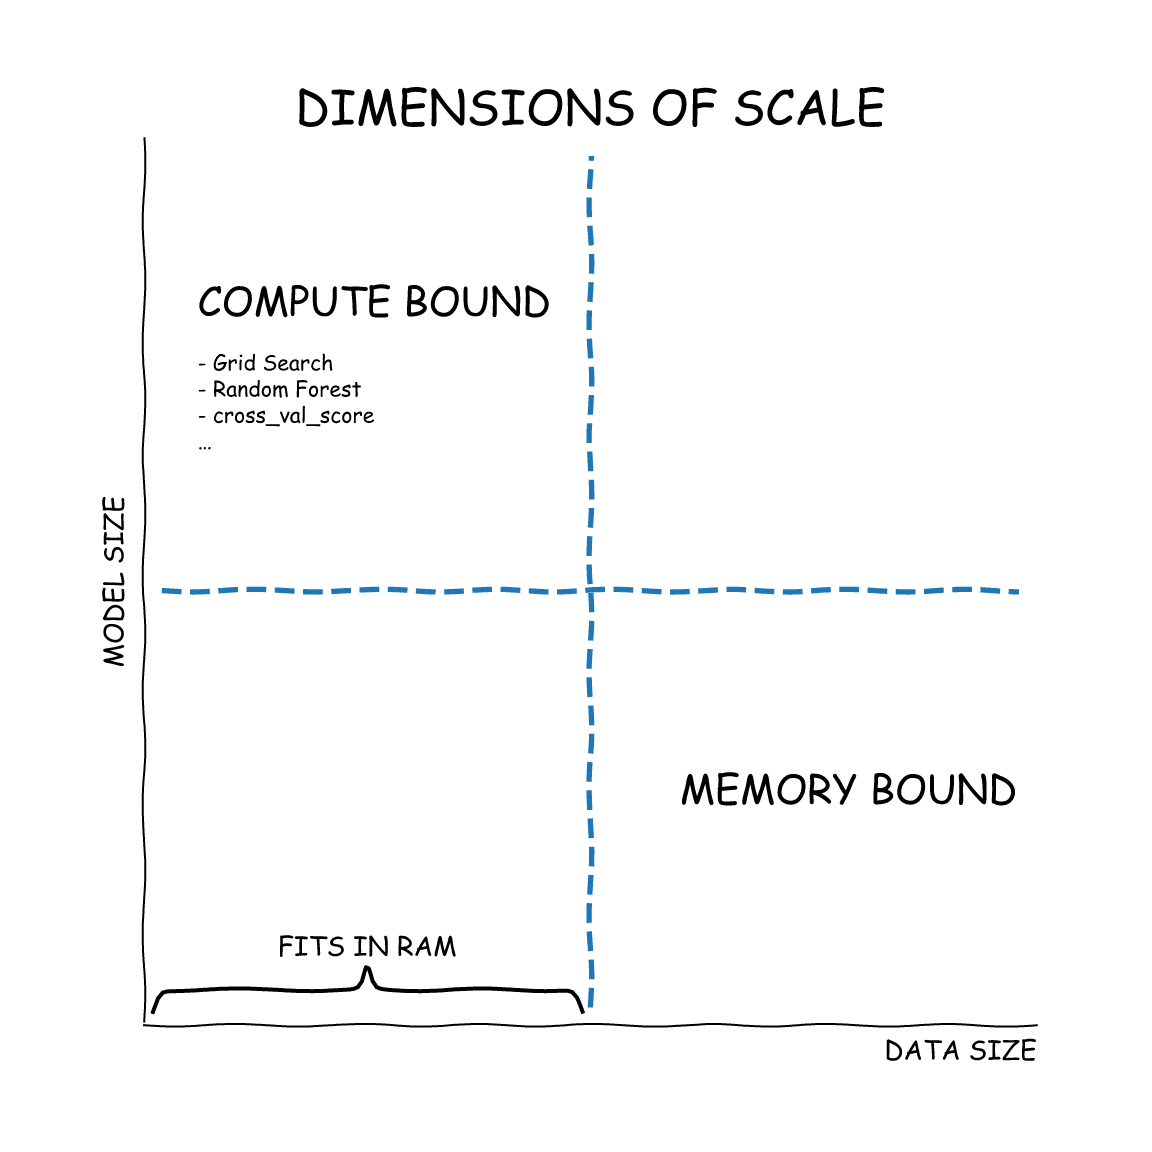

- `dask-ML` attempts to expose much of sklearn capabilities but atop `dask.distributed` and hence do a lot of computation out of core (see https://github.com/dask/dask-searchcv). 

- `MLLib` sits atop Spark and is meant for large-scale distributed learning tasks (http://spark.apache.org/docs/latest/ml-guide.html)

- `ray`


In [ ]:
#!pip install -U dask_ml

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

# Fit with dask-ML
import dask_ml.model_selection as dcv

param_space = {'C': [1e-4, 1],
               'gamma': [1e-3, 1e-2, 1e-2],
               'class_weight': [None, 'balanced']}

model = SVC(kernel='rbf')

digits = load_digits()

search = dcv.GridSearchCV(model, param_space, cv=10, return_train_score=True)
search.fit(digits.data, digits.target)

In [ ]:
search.best_estimator_

In [ ]:
search.best_estimator_.score(digits.data, digits.target)

In [ ]:
search.cv_results_